# Neural Network Assignment 02

1. Anirudha Pal
2. Mohammad Wasil
3. Wei-Chan Hsu

In [41]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sympy import *
init_printing(use_latex='true')
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
x_1, x_2, a = symbols('x_1,x_2,a')
u_1, u_2, u_3, u_4, u_5 = symbols('u_1, u_2, u_3, u_4, u_5')
v_1, v_2, v_3, v_4, v_5 = symbols('v_1, v_2, v_3, v_4, v_5')
y_1, y_1, y_2, y_3, y_4, y_5 = symbols('y_1, y_1, y_2, y_3, y_4, y_5')

u_1 = 5*x_1 + 1*x_2
u_2 = 2*x_1 - 3*x_2

v_1 = u_1 #Normally + bias
v_2 = u_2

#Calculate the output using logistic function
y_1 = 1/(1 + exp(-a * v_1))
y_2 = 1/(1 + exp(-a * v_2))

u_3 = 3*y_1 + 4*y_1
u_4 = -1*y_2 + 6*y_2

v_3 = u_3
v_4 = u_4

y_3 = 1/(1 + exp(-a * v_3))
y_4 = 1/(1 + exp(-a * v_4))

u_5 = -2*y_3 + 1*y_4

v_5 = u_5

y_5 = 1/(1 + exp(-a * v_5))

In [43]:
y_5

                                1                                
─────────────────────────────────────────────────────────────────
        ⎛             2                           1             ⎞
     -a⋅⎜- ──────────────────────── + ──────────────────────────⎟
        ⎜              -7⋅a                        -5⋅a         ⎟
        ⎜       ───────────────────        ─────────────────────⎟
        ⎜            -a⋅(5⋅x₁ + x₂)             -a⋅(2⋅x₁ - 3⋅x₂)⎟
        ⎜       1 + ℯ                      1 + ℯ                ⎟
        ⎝  1 + ℯ                      1 + ℯ                     ⎠
1 + ℯ                                                            

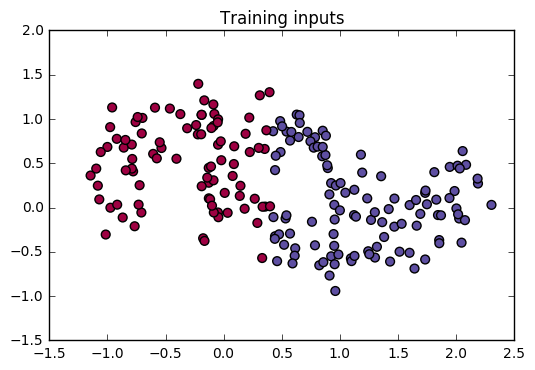

In [44]:
#IMPORT TRAINING AND TEST DATA
np.random.seed(1)
X_, y_ = sklearn.datasets.make_moons(200, noise=0.20)

y = np.zeros((200,1))
X1 = X_[0:200, 0]
X2 = X_[0:200, 1]
#reset y
for i in range (len(X1)):
    if X1[i] < 0.4:
        y[i] = 0
    else:
        y[i] = 1

X = np.array([X1,X2])
X_train = X.T

fig1 = plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title("Training inputs")


In [45]:
import numpy as np
class MLP_ANN(object):
    w1 = np.array([[5.,2.],[1.,-3.]])
    w2 = np.array([[3.,4.],[-1.,-6.]])
    w3 = np.array([-2.,1.])
    w3 = w3.reshape(2,1)
    number_inputs = 200
    X = np.zeros((number_inputs,2))
    y = np.zeros((number_inputs,1))
    l3_error = np.zeros((number_inputs,1))
    
    def set_training_io(self, X, y):
        self.X = X
        self.y = y
        
    def sigmoid(self, v, derivative=False):
        if derivative:
            return v*(1-v)
        return 1/(1 + np.exp(-v))
    
    def feed_forward(self, X):
        input_l = self.X
        hidden_l1 = self.sigmoid(np.dot(self.X, self.w1))
        hidden_l2 = self.sigmoid(np.dot(hidden_l1, self.w2))
        hidden_l3 = np.array(self.sigmoid(np.dot(hidden_l2, self.w3)))
        hidden_l3 = hidden_l3.reshape(self.number_inputs,1)
        #back propagation
        self.l3_error = self.y - hidden_l3
        l3_delta = self.l3_error*self.sigmoid(hidden_l3, derivative=True)

        l2_error = l3_delta.dot(self.w3.T)
        l2_delta = l2_error*self.sigmoid(hidden_l2, derivative=True)

        l1_error = l2_delta.dot(self.w2.T)
        l1_delta = l1_error*self.sigmoid(hidden_l1, derivative=True)

        self.w3 += hidden_l2.T.dot(l3_delta)
        self.w2 += hidden_l1.T.dot(l2_delta)
        self.w1 += input_l.T.dot(l1_delta)
    
    def training(self):
        self.feed_forward(self.X)
        
    def test(self, X_test, numb_of_inputs):
        input_l = X_test
        hidden_l1 = self.sigmoid(np.dot(input_l, self.w1))
        hidden_l2 = self.sigmoid(np.dot(hidden_l1, self.w2))
        hidden_l3 = np.array(self.sigmoid(np.dot(hidden_l2, self.w3)))
        hidden_l3 = hidden_l3.reshape(numb_of_inputs,1)
        
        return hidden_l3

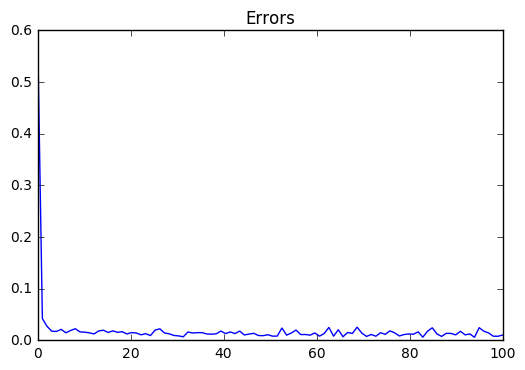

In [46]:
#Training
mlp = MLP_ANN()
mlp.set_training_io(X_train, y)
epochs = 90000
x_axis_length = 100
eval_ = epochs/x_axis_length
errors = []
a = 0
for i in range(epochs):
    mlp.training()
    if (i % eval_) == 0:
        #print "Error:" + str(np.mean(np.abs(mlp.l3_error)))
        errors.append(np.mean(np.abs(mlp.l3_error)))

#plot the errors every  ep
x_axis = np.linspace(0,x_axis_length,x_axis_length)
plt.plot(x_axis, errors)
plt.title("Errors")

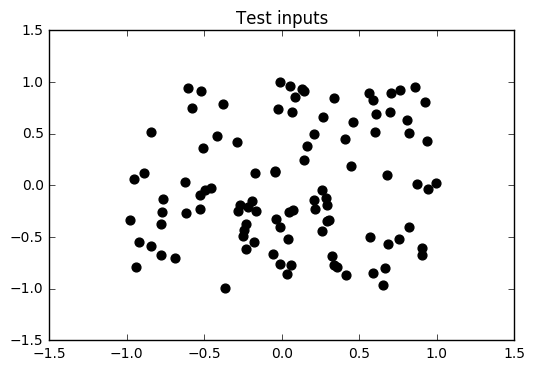

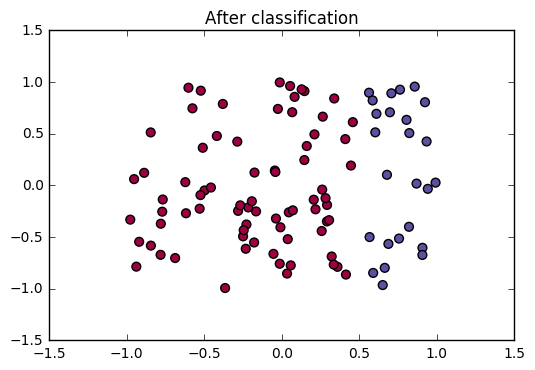

In [40]:
#Test
number_of_inputs = 100
test_inputs = 2*np.random.random((number_of_inputs,2)) - 1

#Plot test input
fig3 = plt.figure()
plt.scatter(test_inputs[:,0], test_inputs[:,1], s=40, c='black', cmap=plt.cm.Spectral)
plt.title("Test inputs")

y_test = mlp.test(test_inputs, number_of_inputs)
y_test = y_test.round(1)
y_test = y_test.astype(int)

fig4 = plt.figure()
plt.scatter(test_inputs[:,0], test_inputs[:,1], s=40, c=y_test, cmap=plt.cm.Spectral)
plt.title("After classification")